輸入立委臉書粉專內容及選舉政見資料

In [1]:
import pandas as pd
import jieba
from tqdm import tqdm
import re
import matplotlib.pyplot as plt
fb1=pd.read_csv('nysu_10902_2019立委_research.csv')
fb2=pd.read_csv('nysu_10902_2019_research_right.csv')
fba=pd.merge(fb1,fb2,how="outer")
fb3=pd.read_csv('nysu_10902_2019立委_research_補.csv')
fb4=pd.read_csv('nysu_10902_2019立委_research_補2.csv')
fbb=pd.merge(fb3,fb4,how="outer")
fb5=pd.read_csv('nysu_10902_2019立委_research_補3.csv')
fb6=pd.read_csv('nysu_10902_2019立委_research_補4.csv')
fbc=pd.merge(fb5,fb6,how="outer")
fb7=pd.read_csv('nysu_10902_2019立委_research_補5.csv')

In [2]:
fbA=pd.merge(fba,fbb,how="outer")
fbB=pd.merge(fbc,fb7,how="outer")

In [3]:
fb=pd.merge(fbA,fbB,how="outer")
pd.set_option('display.max_colwidth', None)#setting the maximize string show
politics = pd.read_csv('9th_legislator_promise.csv')

In [4]:
import numpy as np
from collections import Counter

fb.page_name.unique() #觀察人名在資料集中叫什麼名字
politics.姓名.unique()

array(['吳思瑤', '姚文智', '何志偉', '蔣萬安', '李彥秀', '林昶佐', '蔣乃辛', '費鴻泰', '賴士葆',
       '呂 孫 綾', '林 淑 芬', '高志鵬', '余天', '吳 秉 叡', '蘇 巧 慧', '張 宏 陸', '羅 致 政',
       '江 永 昌', '林 德 福', '吳 琪 銘', '羅 明 才', '黃 國 昌', '蔡適應', '鄭 運 鵬',
       '陳賴素美', '陳學聖', '鄭寶清', '呂玉玲', '趙正宇', '林為洲', '柯建銘', '陳超明', '徐志榮',
       '蔡其昌', '顏寬恒', '洪慈庸', '張廖萬堅', '盧秀燕', '沈智慧', '黃國書', '何欣純', '江啟臣',
       '王惠美', '柯呈枋', '黃秀芳', '洪宗熠', '陳素月', '馬 文 君', '許 淑 華', '蘇 治 芬',
       '劉 建 國', '李 俊 俋', '蔡 易 餘', '陳 明 文', '葉宜津', '黃偉哲', '郭國文  ', '陳亭妃',
       '林俊憲', '王定宇', '邱 議 瑩', '邱 志 偉', '劉 世 芳', '林 岱 樺', '管 碧 玲', '李 昆 澤',
       '趙 天 麟', '馬 凱 妮', '賴 瑞 隆', '蘇震清', '鍾佳濱', '莊瑞雄', '陳歐珀', '蕭美琴',
       '劉櫂豪', '楊 曜', '楊鎮浯', '陳玉珍', '陳雪生', '廖國棟', '鄭天財', '陳瑩', '高金素梅',
       '簡東明', '孔文吉', nan], dtype=object)

以新北市立委林淑芬為例，建立發文文字斷詞表

In [5]:
chiang = fb[fb.page_name == "蔣萬安"]
chiang.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
33916,805460986214082_2033136233446545,805460986214082,蔣萬安,Public Figure,1月27日就要進行士林大同區立委補選\n \n關鍵的一席，我推薦一位認真打拼的好議員陳炳甫 - 台北市議員\n \n懇請您的支持，讓陳炳甫 - 台北市議員進入立法院，為民眾發聲，多一份強力監督民進黨政府的力量！ \n \n \n#陳炳甫 \n#關鍵一席多一份監督的力量 \n#大同士林立委補選1月27日\n \n#陳炳甫粉絲團:https://ppt.cc/f4YWhx,NaN,video,https://www.facebook.com/805460986214082/posts/2033136233446545/,2019-01-05T11:11:58+0000,2019-01-05T19:11:58,...,炳持初衷-陳炳甫,NaN,1856,0,0,0,0,0,693,25


In [6]:
chiang['new_date'] = pd.to_datetime(chiang['created_time_taipei']).dt.date
chiang['month_year'] = pd.to_datetime(chiang['new_date']).dt.to_period('M')
chiang.head(1)

<ipython-input-6-b0b5123ec56b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chiang['new_date'] = pd.to_datetime(chiang['created_time_taipei']).dt.date
<ipython-input-6-b0b5123ec56b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chiang['month_year'] = pd.to_datetime(chiang['new_date']).dt.to_period('M')


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
33916,805460986214082_2033136233446545,805460986214082,蔣萬安,Public Figure,1月27日就要進行士林大同區立委補選\n \n關鍵的一席，我推薦一位認真打拼的好議員陳炳甫 - 台北市議員\n \n懇請您的支持，讓陳炳甫 - 台北市議員進入立法院，為民眾發聲，多一份強力監督民進黨政府的力量！ \n \n \n#陳炳甫 \n#關鍵一席多一份監督的力量 \n#大同士林立委補選1月27日\n \n#陳炳甫粉絲團:https://ppt.cc/f4YWhx,NaN,video,https://www.facebook.com/805460986214082/posts/2033136233446545/,2019-01-05T11:11:58+0000,2019-01-05T19:11:58,...,1856,0,0,0,0,0,693,25,2019-01-05,2019-01


In [7]:
# 依照按讚數 低到高排序
chiang = chiang.sort_values(by=['like_count'])
# 用新的排序當作順序
chiang.reset_index(inplace=True)

結巴斷詞 jieba

1.   len(liu): 看劉櫂豪的貼文總共有幾筆
2.   list(liu['message']): 把要斷詞的內容轉成 list 格式
3.   創造一個新的dataframe叫做liu_docs，型態是pandas.core.frame.DataFrame
4.   原本liu_docs裡面的'jieba_results'欄位型態是pandas.core.series.Series，需要轉成'str'(字串)型態才能做後續處理。

In [8]:
doc_names = range(len(chiang)) #有幾篇文章 : 444 篇文章
doc_names

range(0, 311)

In [9]:
chiang = chiang.replace(np.nan, '', regex=True) # 將nan取代成空白字串
text_list = list(chiang['message']) # 把所有message轉成一個list 用for iterate

What is the difference between lcult() & cut()

In [10]:
# 先看第一個
words = jieba.lcut(text_list[1], cut_all = False) # lcut return a "list"
print(words)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 0.744 seconds.
Prefix dict has been built succesfully.


['交通事故', '發生', '時', '，', '有', '使用', '安全', '座椅', '的', '兒童', '，', '能', '有效', '防止', '憾事', '的', '發生', '，', '我', '曾', '經質詢', '安全', '座椅', '要', '置放', '車輛', '哪個', '位置', '，', '才能', '最', '有效', '保障', '孩子', '安全', '。', '\n', ' ', ' ', ' ', '\n', '很', '高興靖娟', '兒童', '安全', '文教', '基金', '會', '-', '守護', '寶貝', '每', '一天', '持續', '追', '蹤', '並', '且', '關', '注', '兒', '童', '安全', '座椅', '的', '議題', '，', '在', '這邊', '我', '請', '大家', '花一點', '時間', '，', '填寫', '問卷', ' ', 'https', ':', '/', '/', 'ppt', '.', 'cc', '/', 'f61TOx', '，', '共同', '守護', '孩子', '的', '乘車', '安全', '，', '還', '可以', '抽獎', '喔', '！']


In [11]:
words = jieba.cut(text_list[309], cut_all = False) 
print(words)
#for word in words:
 #   print(word)

<generator object Tokenizer.cut at 0x000001E5B728AF20>


把要存斷詞結果的dataframe準備好之後，就可以開始斷詞了。</br>

第一個迴圈</br> 剛才我們知道，劉櫂豪的篇數有999篇： 我們可以用一個for迴圈來跑每一篇文章，i是對應文章的意思，會從1(第一篇)跑到999(第999篇)；</br> 而text_list就是我們剛剛轉成list型態的劉櫂豪貼文內容；text_list[1]，就是取出list第一個元素(第一篇貼文)的意思。</br>

第二個迴圈</br> words存的是文章斷詞後的集合物件(object)，我們需要跑第二個for迴圈把集合裡面的字取出來，</br> word代表斷詞集合中的一個字，先把字轉換成str(字串)型態之後，字和字之間加上空格存在一起。

append加回斷詞欄位</br> 之後把text內容存到'jieba_results'這個欄位裡面，再和liu_docs合併。</br> 最後我們liu_docs，只會一個欄位jieba_results，存斷詞之後的結果。

In [12]:
import jieba
from tqdm import tqdm
import re
jieba.load_userdict("dict.txt")
punctuation = " //，：:""()\n!！？｡＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏"""
re_punctuation = "[{}] ".format(punctuation)

# creat a df to store the jieba result
chiang_docs = pd.DataFrame(columns=['jieba_results']) # 建立df
chiang_docs['jieba_results'] = chiang_docs['jieba_results'].astype('str')

for i in doc_names: #從第一篇到最後一篇
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word) 
    #print(words)
    #print(i) #第幾篇文章
    #print(text) #第幾篇文章的斷詞結果
    text = re.sub(re_punctuation, "", text) # 把上面那些符號從text中刪掉
    text = re.sub(r'[0-9]','',text) # 刪掉數字
    text = re.sub(r'[a-zA-Z]','',text) #刪掉英文字
#刪除文字 更多標點符號
    text = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗🎉⏰💪]','',text)  # 注意裡面不能有空白！
    s = pd.Series({'jieba_results': text})
    chiang_docs = chiang_docs.append(s, ignore_index=True)#每次的斷詞結果都加回liu_docs


In [13]:
#liu_docs.iloc[400:,]  #從讚數最多的檢查

In [14]:
chiang['jieba_results'] = chiang_docs
chiang_post = chiang[['new_date','message','jieba_results','like_count']]
chiang_post

,new_date,message,jieba_results,like_count
0,2019-03-14,感謝李彥秀委員邀我一起錄白色情人節特輯，陪伴就是最棒的禮物，大家別忘了感謝周遭的家人、好友、另一伴，給他們一個溫暖的擁抱！\n\n#大家白色情人節快樂❤️\n#千萬別錯過影片後半段的神秘挑戰\n#謝謝我的老婆,感謝 李彥秀 委員 邀 我 一起 錄 白色 情人 節特輯 陪伴 就是 最棒 的 禮物 大家 別 忘 了 感謝 周遭 的 家人 好友 另 一伴 給他們 一個 溫暖 的 擁抱 大家 白色 情人 節快 樂 ❤ ️ 千萬別 錯過 影片 後 半段 的 神秘 挑戰 謝謝 我 的 老婆,0
1,2019-03-20,交通事故發生時，有使用安全座椅的兒童，能有效防止憾事的發生，我曾經質詢安全座椅要置放車輛哪個位置，才能最有效保障孩子安全。\n \n很高興靖娟兒童安全文教基金會-守護寶貝每一天持續追蹤並且關注兒童安全座椅的議題，在這邊我請大家花一點時間，填寫問卷 https://ppt.cc/f61TOx，共同守護孩子的乘車安全，還可以抽獎喔！,交通事故 發生 時 有 使用 安全 座椅 的 兒童 能 有效 防止 憾事 的 發生 我 曾經 質詢 安全 座椅 要 置放 車輛 哪個 位置 才能 最 有效 保障 孩子 安全 很 高興靖娟 兒童 安全 文教 基金 會 守護 寶貝 每 一天 持續 追 蹤 並 且 關注 兒童 安全 座椅 的 議題 在 這邊 我 請 大家 花一點 時間 填寫 問卷 共同 守護 孩子 的 乘車 安全 還 可以 抽獎 喔,363
2,2019-04-09,"兒童節活動「尋找萬安」得獎名單出爐啦！！🎉🎉\n\n大家是不是找得頭昏眼花了呢?正確答案就是8號！！！\n\n非常謝謝大家熱情的參與，在連假時一起同樂！\n祝福大朋友小朋友天天開心！\n\n🎊得獎者小提醒：\n請10位得獎者將您的收件姓名、電話、地址,私訊小編喔！","兒童節 活動 尋找 萬安 得獎 名單 出爐 啦 大家 是不是 找得頭 昏 眼花 了 呢 正確 答案 就是 號 非常 謝謝 大家 熱情 的 參與 在 連假時 一起 同樂 祝福 大 朋友 小朋友 天天 開心 🎊 得 獎者 小 提醒 請 位得 獎者將 您 的 收件 姓名 電話 地址 , 私訊小編 喔",371
3,2020-01-10,,,390
4,2019-06-25,【 台灣金團結 Taiwan Assemble 】\n炎炎夏日午後，感謝 台灣公道伯 王金平 邀我一起話家常！\n一起來聽聽看我們聊些什麼有趣的事吧！\n\n#台灣金團結\n#TaiwanAssemble,台灣 金 團結 炎炎夏日 午 後 感謝 台灣 公道 伯 王金平 邀 我 一起 話家常 一起 來 聽聽看 我們 聊些 什麼 有趣 的 事 吧 台灣 金 團結,479
...,...,...,...,...
306,2019-12-23,《實在 是用政績爲選民負責到底》\n \n過去四年，萬安在國會專業問政、地方熱忱服務，希望贏得您的支持與肯定。明年的1月11日，懇請您一定要出來投票，支持會做事、能做事以及肯做事4號蔣萬安！\n \n#實在 #蔣萬安\n#國會評鑑連續七會期優秀立委\n#1月11日票投4號蔣萬安 \n#為您想更遠 #做更多\n \n《影片音樂來源》 http://www.bensound.com\n\n👉追蹤我的Line:\nhttp://nav.cx/88l6guv\n👉追蹤我的IG：\nhttps://www.instagram.com/wanan.chiang/\n👉線上_小額捐款 :\nhttps://donate.newebpay.com/wanan2020/cwsk_12\n👉臨櫃_劃撥捐款:\n銀行:台灣銀行 群賢分行\n戶名:109年立法委員擬參選人蔣萬安政治獻金專戶\n帳號:(004)162001007895,《 實在 是 用政績 爲 選民 負責 到底 過去 四年 萬安在 國會 專業 問政 地方 熱忱 服務 希望 贏得 您 的 支持 與 肯定 明年 的 月 日 懇請 您 一定 要 出來 投票 支持 會做事 能 做事 以及 肯 做事 號蔣 萬安 實在 蔣萬安 國會 評鑑 連續 七會期 優秀 立委 月 日票 投 號蔣 萬安 為 您 想 更 遠 做 更 多 《 影片 音樂來源 👉 追 蹤 我 的 👉 追 蹤 我 的 👉 線上 小額捐款 👉 臨櫃 劃撥 捐款 銀行 台灣 銀行 群賢 分行 戶名 年 立法委員 擬參選人 蔣萬安 政治獻金 專戶 帳號,20172
307,2019-11-27,,,20405
308,2019-12-30,濕冷下雨的周一早上，我在路口，跟出門上班的大家，互相加油打氣！\n\n今明兩天氣溫偏低、降雨機會大，大家出門別忘了攜帶雨具，多加件衣服。,濕冷 下雨 的 周一 早上 我 在 路口 跟 出門 上班 的 大家 互相 加油 打氣 今明 兩天 氣溫 偏低 降雨 機會 大 大家 出門別 忘 了 攜帶 雨具 多加件 衣服,24140
309,2019-11-13,香港的學生及年輕人，無懼港警強力鎮壓，為了捍衛自由與民主，向全世界發聲及吶喊，對於這樣的勇敢，我必須要給予最高的敬意。\n \n在臺灣，一國兩制沒有存在的空間，民主自由憲政體制也不容任何破壞及妥協。政府除了要密切注意並維護在香港就讀的臺生、在港工作的臺灣民眾人身安全，必要時也該提供香港民眾人道救援。,香港 的 學生 及 年輕人 無懼 港警 強力 鎮壓 為 了 捍衛 自由 與 民主 向 全世界 發聲 及 吶喊 對 於 這樣 的 勇敢 我 必須 要 給予 最高 的 敬意 在 臺灣 一國兩制 沒有 存在 的 空間 民主自由 憲政體制 也 不容 任何 破壞 及 妥協 政府 除了 要 密切注意 並維護 在 香港 就 讀 的 臺 生 在 港 工作 的 臺灣 民眾 人身安全 必要 時 也 該 提供 香港 民眾 人道救援,28585


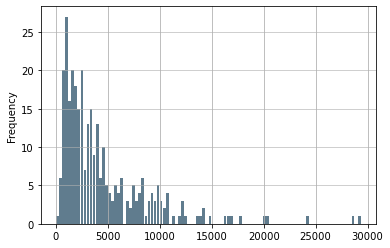

In [15]:
# 看讚數的分佈 y 軸是該讚數的貼文數 來看我們要怎麼取哪個讚數區間資料
commutes = chiang_post['like_count']
commutes.plot.hist(grid=True, bins=100, rwidth=0.9,
color='#607c8e')
plt.grid(axis='y', alpha=0.75)

In [16]:
temp = chiang_post[(chiang_post['like_count'] <= 5000) & (chiang_post['like_count'] > 2000)] #讚數大於500 小於1000才取 : 201  篇文章
temp

,new_date,message,jieba_results,like_count
105,2019-06-10,【教師年資補償金 請民進黨不要打假球！】\n\n公立學校教職員年資補償金落日條款6月30日即將到來，未來即將召開立法院臨時會，將是最後的補救機會。我與 柯志恩、 立法委員林奕華 委員，共同參與記者會，呼籲民進黨把補償金修法納入臨時會議程，趕快修正通過！\n\n公教年資補償金是民國84、85年實施退撫新制時，在新舊制度銜接過程中，將原適用恩給制度納入退撫新法適用者給予之補償設計，以維持法安定性及信賴保護原則，制度設計原本希望教師留在職場更久。\n\n詎料年改修法後，明定本條例施行之日起一年後不再發給補償金，將造成公立學校教職員於108年7月1日前申請退休可以請領，108年7月1日後申請退休者無法領取之不公平、也不平等的現象，形同懲罰留在職場的教師。\n\n再者，對比類似背景的軍人補償金，在107年推動之軍人年金改革也同樣維持補償金規定。如果不修法，將造成年金改革，就同一補償金制度，在公務人員、教師及軍人出現不同標準，形成差別待遇，嚴重打擊老師的士氣，對他們也不公平。\n\n目前共有12個修法版本、民進黨也提案，甚至高達八成委員也連署支持，為何卻阻擋修法通過？臨時會召開在即，絕對來得及在6/30前完成三讀，將這個不公平的狀態改正，請民進黨不要打假球，趕快通過修法！\n\n#請給公教人員公平待遇\n#回復補償金\n\n--------------------------------------\n👉即時接收消息，追蹤我的Line：\nhttps://line.me/R/ti/p/%40wanan\n👉私底下的一面，追蹤我的IG：\nhttps://www.instagram.com/wanan.chiang/,教師 年 資補償 金 請 民進黨 不要 打 假球 公立 學校 教 職員年 資補償 金 落日 條款 月 日即 將到 來 未來 即將 召開 立法院 臨時會 將是 最 後 的 補救 機會 我 與 柯志恩 立法委員 林奕華 委員 共同 參與 記者會 呼籲 民進黨 把 補償 金修 法納入 臨時會 議程 趕快 修正 通過 公教 年 資補償 金是 民國 年 實施 退撫 新制 時 在 新 舊 制度 銜接 過程 中 將原 適用 恩給 制度 納入 退撫 新法 適用者 給予 之 補償 設計 以維 持法 安定性 及 信賴 保護 原則 制度 設計 原本 希望 教師 留在 職場 更久 詎 料 年 改修 法 後 明定 本 條例 施行 之日起 一年 後 不再 發給 補償 金 將 造成 公立 學校 教職員 於 年 月 日前 申請 退休 可以 請領 年 月 日後申 請 退休者 無法 領取 之 不 公平 也 不 平等 的 現象 形同 懲罰 留在 職場 的 教師 再者 對 比類 似 背景 的 軍人 補償 金 在 年 推動 之軍人 年金改革 也 同樣 維持 補償 金規定 如果 不修法 將 造成 年金改革 就 同一 補償 金 制度 在 公務人員 教師 及 軍人 出現 不同 標準 形成 差別 待遇 嚴重 打擊 老師 的士 氣 對 他們 也 不 公平 目前 共有 個 修法 版本 民進黨 也 提案 甚至 高達 八成 委員 也 連署 支持 為何 卻 阻擋 修法 通過 臨時會 召開 在 即 絕對 來 得 及 在 前 完成 三讀 將這個 不 公平 的 狀態 改正 請 民進黨 不要 打 假球 趕快 通過 修法 請給 公教 人員 公平 待遇 回 復 補償 金 👉 即時 接收 消息 追 蹤 我 的 👉 私底下 的 一面 追 蹤 我 的 /,2022
106,2019-10-25,謝謝每一位醫療奉獻獎的得主，您的信念及大愛，必然守護及照亮臺灣每一個角落！\n \n今天很榮幸以厚生會會長的身份，參加中華民國第二十九屆醫療奉獻獎選拔暨表揚活動記者會，每一位得獎者除了是醫者仁心，更將自己最精華的人生歲月，奉獻在守護台灣民眾健康上。醫療奉獻獎除了表彰這些醫療人員的貢獻，更希望能夠將這份典範永續的傳承下去。\n \n這次的得獎名單，有服務台大超過一甲子歲月，迄今仍不遺餘力提攜後進、獎助醫學研究，高齡92歲的連文彬醫師。我小時候還給連醫師看過診，迄今還記得連醫師看診的態度非常和藹，讓當時很害怕看醫師的我，覺得安心。\n \n真的謝謝每一位醫療奉獻獎的得獎者，我相信每一位得獎人的事蹟、他們背後堅持的信念及無私奉獻的大愛，如同火炬般代代傳承，持續照亮、守護臺灣每一個需要醫療的角落。,謝謝 每 一位 醫療 奉獻獎 的 得主 您 的 信念 及大愛 必然 守護 及 照亮 臺灣 每一個 角落 今天 很榮 幸以 厚生 會會長 的 身份 參加 中華民國 第二十九 屆 醫療 奉獻獎 選拔 暨 表揚 活動 記者會 每 一位 得 獎者 除了 是 醫者 仁心 更將 自己 最精華 的 人生 歲 月 奉獻 在 守護 台灣 民眾 健康 上 醫療 奉獻獎 除了 表彰 這些 醫療 人員 的 貢獻 更 希望 能 夠將 這份 典範永續 的 傳承 下去 這次 的 得獎 名單 有 服務 台大 超過 一甲子 歲 月 迄今 仍 不 遺餘力 提攜後進 獎助 醫學 研究 高齡 歲 的 連文彬 醫師 我小時候 還給 連醫師 看 過診 迄今 還記 得 連醫師 看診 的 態度 非常 和 藹 讓 當時 很 害怕 看醫師 的 我 覺得 安心 真的 謝謝 每 一位 醫療 奉獻獎 的 得 獎者 我 相信 每 一位 得獎 人 的 事 蹟 他們 背後堅持 的 信念 及無私 奉獻 的 大 愛 如同 火炬 般 代代 傳承 持續 照亮 守護 臺灣 每一個 需要 醫療 的 角落,2039
107,2019-11-25,"#萬安親子故事屋冬季場 ＃12月14日熱鬧登場! 🔥\n \n許多大朋友小朋友喜愛的 #萬安親子故事屋，即將在12月14日(星期六)晚上七點開演啦！萬安叔叔邀請如果劇團演出「#阿布交了壞朋友？」，故事內容很精彩，小朋友千萬不要錯過喔！👭👫\n \n還在煩惱周末要怎麼安排小朋友活動的爸爸、媽媽，趕快帶孩子報名參加 #萬安親子故事屋吧！讓孩子們在歡樂的環境學習，在成長過程留下美好的回憶！現場還準備小點心，名額有限，趕快報名參加！ 👨‍👩‍👧‍👦\n \n\n 🎈活動名稱：萬安故事屋-阿布交了壞朋友？\n 🎈活動時間：12/14 (六) 19:00-20:30\n 🎈活動地點：民有區民活動中心(民權東路三段140巷15號4樓)\n 🎈演出單位：如果兒童劇團\n 🎈報名資訊：\n1.適合3-6歲觀賞\n2.電話報名：02-2358-8268 (平日09:30-17:00)\n3.LINE報名：官方帳號搜尋""蔣萬安"" 或是點選 http://nav.cx/88l6guv\n\n#名額有限 #快來報名\n#蔣萬安\n#故事歡樂又有趣\n#如果兒童劇團🎨🤹‍♂","萬安 親子 故事 屋 冬季 場 月 日熱鬧 登場 🔥 許多大 朋友 小朋友 喜愛的 萬安 親子 故事 屋 即將 在 月 日 星期六 晚上 七點 開演 啦 萬安 叔叔 邀請 如果 劇團 演出 阿布交 了 壞 朋友 故事 內容 很 精彩 小朋友 千萬 不要 錯過 喔 👭 👫 還在 煩惱 周末 要 怎麼 安排 小朋友 活動 的 爸爸 媽媽 趕快 帶 孩子 報名 參加 萬安 親子 故事 屋 吧 讓 孩子 們 在 歡樂 的 環境 學習 在 成長 過程 留下 美好 的 回憶 現場 還準備 小點心 名額 有限 趕快 報名 參加 👨 ‍ 👩 ‍ 👧 ‍ 👦 🎈 活動 名稱 萬安 故事 屋 阿布交 了 壞 朋友 🎈 活動 時間 六 🎈 活動 地點 民有 區民 活動 中心 民權 東路 三段 巷 號 樓 🎈 演出 單位 如果 兒童 劇團 🎈 報名 資訊 適合 歲 觀賞 電話 報名 平日 報名 官方 帳號 搜尋 "" 蔣萬安 "" 或是 點選 名額 有限 快來 報名 蔣萬安 故事 歡樂 又 有趣 如果 兒童 劇團 🎨 🤹 ‍ ♂",2043
108,2019-01-19,和李柏毅 毅心為您 一起寫春聯 金豬萬安！,和 李柏毅 毅心 為 您 一起 寫春聯 金豬 萬安,2055
109,2019-09-18,"「鬆綁十年繳費大限，讓國保能保障經濟弱勢民眾老年生活！」\n \n國民年金（國保）是97年10月1日開辦的社會保險，主要納保對象，是年滿25歲、未滿65歲，沒有參加勞保、農保、公教保、軍保的國民，截至今年4月份為止，應納保人數約330萬人。\n \n攸關民眾老年生活保障的老年年金給付有A、B二式：A式以3,628元為基礎保證年金，再根據年資往上加；B式以月投保金額×保險年資×1.3%。A式固然比B式優厚，但適用A式前提必須符合沒有欠費、未領其他社會保險老年給付資格。舉例來說，開辦首期均依規定繳費到現在的民眾，每月最多可領4,816元，倘若首期沒有繳納，由於十年補繳期限已過，僅能請領2,377元，每月少領2,439元。\n \n有民眾向我提出陳情，當時國民年金開辦時，由於生活相當困頓，忙於生計又不懂法令，實在不曉得影響如此重大，希望能有補救的機會。\n \n我發現第一期到第四期首期保費未繳納人數平均有110多萬人，其中 有1.6萬人今年年滿65歲達到請領老年給付要件（只能適用B式）。跟行政機關開會討論並研究後，考量未能遵期繳納國民年金的民眾，多屬社會弱勢，非惡意不為繳納，如能加計利息、滯納金後補繳，至少能讓弱勢民眾老年享有基本經濟保障，也符合國保當初制訂時採柔性強制納保的立法目的。因此我將提出「國民年金法第十七條條文修正草案」，希望鬆綁現行

TF-IDF
我們把剛才斷好詞的貼文，轉成list形式，全部放到corpus變數裡面，方便做tf-idf處理。

CountVectorizer算字頻（搭配fit_transform）
TfidfTransformer計算TFIDF

In [17]:
corpus = temp['jieba_results'].values.tolist() #如果不做這個、結果會不同 太generall

In [18]:
# TF-IDF
# coding:utf-8  

#算字頻
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  # 計算單字出現在文件中的次數
X = vectorizer.fit_transform(corpus) #  input must be a list, return a matrix (#of corpus) x (# of word) # 201 x 4835
word = vectorizer.get_feature_names() # column name which is the word
message_column = word

#計算TFIDF
from sklearn.feature_extraction.text import TfidfTransformer  # 計算tfidf
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X) # X : corpus x word matrix, output:201 x 4835

In [19]:
tfidf_view = pd.DataFrame(tfidf.toarray(), columns = vectorizer.get_feature_names())
tfidf_view

,一下,一些,一份,一休,一位,一例,一個,一切,一動,一句,...,點滴,點請,點進,點選,黨中央,黨內,黨政,鼓勵,龍江路,龍洲
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.208356,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.075373,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,0.0,0.0,0.0,0.0,0.081978,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.084149,0.0,0.0
113,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
114,0.0,0.0,0.0,0.0,0.037961,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
115,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.114443,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.152039,0.0,0.0


In [20]:
# #使用LDA演算法
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=5, random_state=None)
LDA.fit(X) # 用countrvectorizer() result 去fit 

topic_message = list()
#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    mes_topic = [vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]]
    print(mes_topic)
    for i in mes_topic:
        topic_message.append(i)

TOP 10 WORDS PER TOPIC #0
['出勤', '米塔', '制度', '立法', '今天', '臺灣', '安全', '台灣', '謝謝', '大家']
TOP 10 WORDS PER TOPIC #1
['支持', '換證', '身心障礙', '市場', '鄉親', '謝謝', '銀行', '今天', '朋友', '大家']
TOP 10 WORDS PER TOPIC #2
['服務', '鄉親', '蔣萬安', '報名', '臺灣', '故事', '朋友', '活動', '萬安', '大家']
TOP 10 WORDS PER TOPIC #3
['今天', '法律', '直播', '照顧', '晚安', '服務', '一起', '臺灣', '長照', '大家']
TOP 10 WORDS PER TOPIC #4
['健康', '老年', '人員', '護理', '民眾', '朋友', '今天', '酒駕', '修法', '勞工']


In [21]:
LDA.fit(tfidf) # 用tfidf result 去fit 

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['銀行', '朋友', '服務', '大家', '劇團', '一起', '活動', '故事', '報名', '萬安']
TOP 10 WORDS PER TOPIC #1
['週末', '市場', '朋友', '鄉親', '平安', '謝謝', '臺灣', '支持', '鄭世維', '大家']
TOP 10 WORDS PER TOPIC #2
['女士', '朋友', '端午', '萬安講', '晚上', '平論', '法律', '大家', '直播', '晚安']
TOP 10 WORDS PER TOPIC #3
['一起', '辛苦', '健行', '客家', '天氣', '活動', '元宵', '公益', '中山', '大家']
TOP 10 WORDS PER TOPIC #4
['報告', '準備', '媽祖', '即時', '萬安', '謝謝', '棒球', '松山', '情人', '大家']


In [22]:
#政見做斷詞

politics_chiang = politics[politics.姓名 == "蔣萬安"].政見.to_string()
politics_chiang = re.sub(re_punctuation, "", politics_chiang)
politics_chiang = re.sub(r'[0-9]','',politics_chiang)
politics_chiang = re.sub(r'[a-zA-Z]','',politics_chiang)
politics_chiang = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗]','',politics_chiang)  # 注意裡面不能有空白！
jieba.load_userdict("dict.txt")
words = jieba.lcut(politics_chiang, cut_all = False)


In [23]:
#觀察政見的斷詞結果
inspect_words = jieba.cut(politics_chiang, cut_all = False)
text = ''
for word in inspect_words:
    text = text + ' ' + str(word) 
text = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗]','',text)
text = re.sub(re_punctuation, "", text)


In [24]:
# 比較、查看他政見
promise = politics[politics.姓名 == "蔣萬安"].政見.to_string()
re.split('。 |：', promise) # skip this, just to make it easier to read

['3    一、立委要傾聽民意，推動立法解決問題。萬安會秉持理性問政、創新立法 理念，為民眾服務',
 '二、推動「幼兒照護」',
 '提高生育率，也要設法減輕父母養育負擔；建全托 育機制與社區保姆系統，讓父母放心打拼；加強校園安全，讓孩子在安 全環境學習；持續監督、要求幼兒園師資、課程及設備達到法定標準， 讓孩子快樂學習、適性發展以及健康成長',
 '三、推動「銀髮族照護」',
 '建立「社區化」、「在地化」長照目標；立法確 立長照保險穩定財源；督促政府建構完整銀髮族照護與醫療制度；鼓勵 社會企業加入照護長輩行列；針對「退而不休」銀髮族規劃社會參與活 動，讓退休生活有目標、有尊嚴',
 '四、連結「教育與就業」',
 '重新檢討臺灣高教政策的走向與定位；強化技職 教育，鼓勵企業提供學生實習機會及產學合作；縮短學用落差、建構教 育與就業銜接機制，讓青年畢業即就業。青年適才適所、發揮所長，臺 灣才有競爭力',
 '五、連結「科技與創業」',
 '鬆綁法規限制，吸引國外資金投資國內產業；建 構新創產業生態鏈，讓臺灣新創公司根留本土，佈局全球，使全民共享 經濟成長果實；掌握未來發展趨勢，推動程式語言向下紮根，讓孩子學 習程式語言，培養臺灣軟體人才',
 '六、解決在地「治安問題」',
 '中山、松山區都有犯罪熱點，需中央、地方共 同解決。萬安將協助並結合議員、里長及社區巡守隊力量，配合警力建 立共同防護網，保障民眾安全；持續透過教育宣導、舉辦社區活動等方 式，結合家庭與學校力量防止犯罪，守護家園',
 '七、積極解決「停車問題」',
 '中山、松山區停車位不足情況，分占北市12行 政區中第1名、第3名。萬安會積極協助議員並與市府合作，共同改善停 車位供需失衡情況，解決民眾停車位不足問題。']

In [25]:
# 政見做tfidf
p_vectorizer = CountVectorizer()  
p_X = p_vectorizer.fit_transform(words)  
word = p_vectorizer.get_feature_names() 
p_transformer = TfidfTransformer()  
p_tfidf = p_transformer.fit_transform(p_X) #143 word in 

p_LDA = LatentDirichletAllocation(n_components=7, random_state=None)

#政見做LDA
p_LDA.fit(p_tfidf)
topic_politics = list()
#觀看結果
for i,topic in enumerate(p_LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    topic_p = [p_vectorizer.get_feature_names()[index] for index in topic.argsort()[-8:]]
    print(topic_p)
    for i in topic_p:
        topic_politics.append(i)

TOP 10 WORDS PER TOPIC #0
['經濟', '新創產業生態鏈', '建立', '照護', '社會', '父母', '成長', '問題']
TOP 10 WORDS PER TOPIC #1
['防止', '保障', '養育負擔', '規劃', '松山', '教育', '就業', '孩子']
TOP 10 WORDS PER TOPIC #2
['地化', '機制', '未來發展', '學生', '企業', '持續', '萬安會', '解決']
TOP 10 WORDS PER TOPIC #3
['培養', '吸引', '第名', '安全', '鼓勵', '社區', '民眾', '停車位不足']
TOP 10 WORDS PER TOPIC #4
['立委', '完整', '傾聽民意', '結合', '立法', '情況', '建構', '力量']
TOP 10 WORDS PER TOPIC #5
['加強', '制度', '全環境', '全民', '區都', '協助', '銀髮族照護', '推動']
TOP 10 WORDS PER TOPIC #6
['全球', '積極', '中山', '連結', '目標', '議員', '程式語言', '臺灣']


In [26]:
# #政見所有topic 總表
for i in topic_politics:
#for i in topic_:# 文章內容的topic所有字的總表
    print(i,end = ', ')

經濟, 新創產業生態鏈, 建立, 照護, 社會, 父母, 成長, 問題, 防止, 保障, 養育負擔, 規劃, 松山, 教育, 就業, 孩子, 地化, 機制, 未來發展, 學生, 企業, 持續, 萬安會, 解決, 培養, 吸引, 第名, 安全, 鼓勵, 社區, 民眾, 停車位不足, 立委, 完整, 傾聽民意, 結合, 立法, 情況, 建構, 力量, 加強, 制度, 全環境, 全民, 區都, 協助, 銀髮族照護, 推動, 全球, 積極, 中山, 連結, 目標, 議員, 程式語言, 臺灣, 

In [27]:
#在LDA結果中每個Topic政見的詞 、 臉書貼文的詞的交集 
#set(topic_politics).intersection(topic_message) 
Counter(topic_politics+topic_message) #綜合臉書發文、政見 Topic 的詞 看出現次數
#產業升級、園區、高科技園區、加工區 、楠梓、交通、三鐵同構

Counter({'經濟': 1,
         '新創產業生態鏈': 1,
         '建立': 1,
         '照護': 1,
         '社會': 1,
         '父母': 1,
         '成長': 1,
         '問題': 1,
         '防止': 1,
         '保障': 1,
         '養育負擔': 1,
         '規劃': 1,
         '松山': 1,
         '教育': 1,
         '就業': 1,
         '孩子': 1,
         '地化': 1,
         '機制': 1,
         '未來發展': 1,
         '學生': 1,
         '企業': 1,
         '持續': 1,
         '萬安會': 1,
         '解決': 1,
         '培養': 1,
         '吸引': 1,
         '第名': 1,
         '安全': 2,
         '鼓勵': 1,
         '社區': 1,
         '民眾': 2,
         '停車位不足': 1,
         '立委': 1,
         '完整': 1,
         '傾聽民意': 1,
         '結合': 1,
         '立法': 2,
         '情況': 1,
         '建構': 1,
         '力量': 1,
         '加強': 1,
         '制度': 2,
         '全環境': 1,
         '全民': 1,
         '區都': 1,
         '協助': 1,
         '銀髮族照護': 1,
         '推動': 1,
         '全球': 1,
         '積極': 1,
         '中山': 1,
         '連結': 1,
         '目標': 1,
         '議員': 1,
         

我們可以用 臉書貼文和政見 Topic word 的交集 會推測
劉世芳的幾個重點
1. 經濟相關的科技 園區和加工區
    - 高科技、發展、產業、加工區、園區、產業、就業、計畫、建設、
2. 楠梓地區
    -楠梓
3. 交通
    -三鐵同構、中油、交通、
4. 環境
    -環境、綠能、

職災 相關tf idf 高 (以下討論臉書貼文)

In [28]:
top_10_message = tfidf_view.sort_values(by = ['安全'], ascending = False).index[:10] # 把高科技tfidf 高的文章做排序取top 10的文章 拿出文章的index
tfidf_view.sort_values(by = ['安全'], ascending = False).head(10)

,一下,一些,一份,一休,一位,一例,一個,一切,一動,一句,...,點滴,點請,點進,點選,黨中央,黨內,黨政,鼓勵,龍江路,龍洲
6,0.0,0.000000,0.0,0.0,0.077828,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
29,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
50,0.0,0.000000,0.0,0.0,0.059379,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.060951,0.0,0.0
35,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
76,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
86,0.0,0.097922,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.070690,0.0,0.0
85,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.162155,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
84,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.213034,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
83,0.0,0.000000,0.0,0.0,0.000000,0.0,0.045194,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [29]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[6,]).sort_values(by = 6, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption

,6
安全,0.394258
勤務,0.240536
謝謝,0.234480
勇敢,0.221328
警員能,0.120268
...,...
將高達,0.000000
專利,0.000000
專區,0.000000
專家,0.000000


In [30]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[29,]).sort_values(by = 29, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption

,29
長照,0.381721
照顧,0.283886
胃藥,0.207011
安全,0.169654
更換,0.155258
...,...
小孩,0.000000
小學生,0.000000
小弟弟,0.000000
小心,0.000000


In [31]:
top_10_message_han = tfidf_view.sort_values(by = ['韓國瑜'], ascending = False).index[:10] # 把高科技tfidf 高的文章做排序取top 10的文章 拿出文章的index
tfidf_view.sort_values(by = ['韓國瑜'], ascending = False).head(10)

,一下,一些,一份,一休,一位,一例,一個,一切,一動,一句,...,點滴,點請,點進,點選,黨中央,黨內,黨政,鼓勵,龍江路,龍洲
11,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
30,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
83,0.0,0.000000,0.0,0.0,0.000000,0.0,0.045194,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
75,0.0,0.000000,0.0,0.0,0.063847,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
87,0.0,0.000000,0.0,0.0,0.000000,0.0,0.054770,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.106529,0.0,0.0
86,0.0,0.097922,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.070690,0.0,0.0
85,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.162155,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
84,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.213034,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
82,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [32]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[11,]).sort_values(by = 11, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption

,11
鋪馬路,0.462208
謝謝琳,0.346656
高雄,0.318974
市長,0.299333
韓國瑜,0.299333
...,...
將原,0.000000
將啟,0.000000
將在,0.000000
將少,0.000000


In [33]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[30,]).sort_values(by = 30, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption

,30
會談,0.298096
中聯辦,0.274292
陳明通,0.274292
報告,0.224548
邢魁山,0.223572
...,...
專利,0.000000
專區,0.000000
專家,0.000000
專戶,0.000000


In [34]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[83,]).sort_values(by = 83, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption

,83
禽獸,0.397002
陳明通,0.304416
豬狗禽,0.198501
不如,0.198501
農民,0.198501
...,...
將風險,0.000000
將高達,0.000000
專利,0.000000
專區,0.000000


In [35]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[0,]).sort_values(by = 0, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption

,0
補償,0.428026
教師,0.244586
公平,0.225055
民進黨,0.211197
制度,0.191666
...,...
專業會,0.000000
專櫃,0.000000
專法,0.000000
專注,0.000000


In [36]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[75,]).sort_values(by = 75, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption

,75
公園,0.272353
鄉親,0.223872
禮物,0.197326
送給,0.197326
心意,0.197326
...,...
將更,0.000000
將為,0.000000
將用,0.000000
將美學,0.000000


In [37]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[87,]).sort_values(by = 87, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption

,87
松江,0.314185
鄉親,0.272923
朋友,0.187100
廣大樓,0.160374
號中,0.160374
...,...
專業會,0.000000
專櫃,0.000000
專法,0.000000
專注,0.000000


In [38]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[86,]).sort_values(by = 86, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption

,86
客家,0.587533
挑擔,0.319261
精神,0.293766
奉飯,0.212841
義民爺,0.212841
...,...
將啟,0.000000
將在,0.000000
將少,0.000000
將影響,0.000000


In [39]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[85,]).sort_values(by = 85, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption

,85
專訪,0.324310
立委,0.221513
大家,0.187351
銀行,0.171153
文章,0.162155
...,...
將啟,0.000000
將在,0.000000
將少,0.000000
將影響,0.000000


In [40]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[84,]).sort_values(by = 84, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption

,84
中元節,0.493426
補充,0.246713
水分,0.246713
時時,0.246713
蘭盆節,0.246713
...,...
將原,0.000000
將啟,0.000000
將在,0.000000
將少,0.000000


In [41]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[82,]).sort_values(by = 82, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption

,82
端午,0.611108
節氣氛,0.332071
濃濃過,0.332071
數十場,0.305554
預祝,0.305554
...,...
寶貴,0.000000
將來,0.000000
將全數,0.000000
將到,0.000000


In [42]:
#這些都是讚數很高的文章 每篇文章最高的tfidf 詞
message_newtfidf = tfidf_view
message_newtfidf['term'] = message_newtfidf[message_column].idxmax(axis = 1)
message_newtfidf['term'].tail(20) # 在這邊的話看讚數最多的文章他們tfidf 最高的詞是什麼

97      松山
98     鄭世維
99      優秀
100     祭拜
101     假期
102     市場
103     這個
104     銀行
105     付出
106     一動
107    園遊會
108     美食
109     中山
110    母親節
111    小朋友
112     選舉
113     酒駕
114     長照
115     選戰
116     一下
Name: term, dtype: object

In [43]:
#假如以剛剛科學園區相關主題為例 想看tfidf 最高的詞是科學園區的文章
message_newtfidf[message_newtfidf['term']=="松山"]

,一下,一些,一份,一休,一位,一例,一個,一切,一動,一句,...,點請,點進,點選,黨中央,黨內,黨政,鼓勵,龍江路,龍洲,term
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,松山


In [44]:
# 會發現文章出現tfidf是產業的很少，很正常 因為出現太多反而tfidf不會高！
temp.iloc[97,]

new_date                                                                                                                                                                                                                                                                                                                       2019-08-24
message              萬安來下廚了！\n\n早上參加松山區「2019祖父母節祖孫同樂暨食神盃廚藝競賽」，感謝厲害的總鋪師指導，得以完成美味的客家小炒！\n\n現場也看到許多祖孫三代一起同心協力，大家煮的料理看起來都超好吃！\n\n謝謝主辦單位松山區健康服務中心、松山健康促進協會、松山社區大學，邀請我參加這麼有意義的活動！\n\n#又學了一道菜\n#回家下廚給家人吃\n#大家廚藝都好厲害👍\n#最後有影片\n#颱風天大家要注意安全喔\n\n👉即時接收消息，追蹤我的Line：\nhttp://nav.cx/88l6guv\n👉私底下的一面，追蹤我的IG：\nhttps://www.instagram.com/wanan.chiang/
jieba_results     萬安來 下廚 了 早上 參加 松山 區  祖父母 節祖 孫同樂 暨 食神 盃 廚藝 競賽 感謝 厲害 的 總 鋪師 指導 得以 完成 美味 的 客家 小炒 現場 也 看到 許多 祖孫 三代 一起 同心 協力 大家 煮 的 料理 看起 來 都 超 好吃 謝謝 主辦 單位 松山 區 健康 服務 中心 松山 健康 促進 協會 松山 社區 大學 邀請 我 參加 這麼 有意 義的 活動  又學 了 一道 菜  回家 下 廚給 家人 吃  大家 廚藝 都 好 厲害 👍  最後有 影片  颱風天 大家 要 注意安全 喔 👉 即時 接收 消息 追 蹤 我 的       👉 私底下 的 一面 追 蹤 我 的           /
like_count

來看楠梓 ： 在臉書發文的topic中topic2,4,7 出現很多次楠梓 

In [45]:
message_newtfidf[message_newtfidf['term']=="臺灣"]

,一下,一些,一份,一休,一位,一例,一個,一切,一動,一句,...,點請,點進,點選,黨中央,黨內,黨政,鼓勵,龍江路,龍洲,term
43,0.0,0.0,0.0,0.0,0.0,0.0,0.033592,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,臺灣
73,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,臺灣


In [46]:
temp.iloc[73,]

new_date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           2019-11-27
message          懇請支持「實在。蔣萬安」，繼續為您打拼！讓臺灣更好！\n        \n謝謝各位鄉親好朋友的一路支持與相挺，萬安才能進入立院為大家服務。\n          \n#為您想更遠 #做更多 是萬安服務初衷。\n      \n這四年來，我在

In [47]:
# LDA : 看每篇文章被分配在哪些主題  (tfidf)
#review topic 結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['銀行', '朋友', '服務', '大家', '劇團', '一起', '活動', '故事', '報名', '萬安']
TOP 10 WORDS PER TOPIC #1
['週末', '市場', '朋友', '鄉親', '平安', '謝謝', '臺灣', '支持', '鄭世維', '大家']
TOP 10 WORDS PER TOPIC #2
['女士', '朋友', '端午', '萬安講', '晚上', '平論', '法律', '大家', '直播', '晚安']
TOP 10 WORDS PER TOPIC #3
['一起', '辛苦', '健行', '客家', '天氣', '活動', '元宵', '公益', '中山', '大家']
TOP 10 WORDS PER TOPIC #4
['報告', '準備', '媽祖', '即時', '萬安', '謝謝', '棒球', '松山', '情人', '大家']


In [48]:
#可以猜猜看第一篇文是哪個topic 
temp.iloc[:,[0,2]]

,new_date,jieba_results
105,2019-06-10,教師 年 資補償 金 請 民進黨 不要 打 假球 公立 學校 教 職員年 資補償 金 落日 條款 月 日即 將到 來 未來 即將 召開 立法院 臨時會 將是 最 後 的 補救 機會 我 與 柯志恩 立法委員 林奕華 委員 共同 參與 記者會 呼籲 民進黨 把 補償 金修 法納入 臨時會 議程 趕快 修正 通過 公教 年 資補償 金是 民國 年 實施 退撫 新制 時 在 新 舊 制度 銜接 過程 中 將原 適用 恩給 制度 納入 退撫 新法 適用者 給予 之 補償 設計 以維 持法 安定性 及 信賴 保護 原則 制度 設計 原本 希望 教師 留在 職場 更久 詎 料 年 改修 法 後 明定 本 條例 施行 之日起 一年 後 不再 發給 補償 金 將 造成 公立 學校 教職員 於 年 月 日前 申請 退休 可以 請領 年 月 日後申 請 退休者 無法 領取 之 不 公平 也 不 平等 的 現象 形同 懲罰 留在 職場 的 教師 再者 對 比類 似 背景 的 軍人 補償 金 在 年 推動 之軍人 年金改革 也 同樣 維持 補償 金規定 如果 不修法 將 造成 年金改革 就 同一 補償 金 制度 在 公務人員 教師 及 軍人 出現 不同 標準 形成 差別 待遇 嚴重 打擊 老師 的士 氣 對 他們 也 不 公平 目前 共有 個 修法 版本 民進黨 也 提案 甚至 高達 八成 委員 也 連署 支持 為何 卻 阻擋 修法 通過 臨時會 召開 在 即 絕對 來 得 及 在 前 完成 三讀 將這個 不 公平 的 狀態 改正 請 民進黨 不要 打 假球 趕快 通過 修法 請給 公教 人員 公平 待遇 回 復 補償 金 👉 即時 接收 消息 追 蹤 我 的 👉 私底下 的 一面 追 蹤 我 的 /
106,2019-10-25,謝謝 每 一位 醫療 奉獻獎 的 得主 您 的 信念 及大愛 必然 守護 及 照亮 臺灣 每一個 角落 今天 很榮 幸以 厚生 會會長 的 身份 參加 中華民國 第二十九 屆 醫療 奉獻獎 選拔 暨 表揚 活動 記者會 每 一位 得 獎者 除了 是 醫者 仁心 更將 自己 最精華 的 人生 歲 月 奉獻 在 守護 台灣 民眾 健康 上 醫療 奉獻獎 除了 表彰 這些 醫療 人員 的 貢獻 更 希望 能 夠將 這份 典範永續 的 傳承 下去 這次 的 得獎 名單 有 服務 台大 超過 一甲子 歲 月 迄今 仍 不 遺餘力 提攜後進 獎助 醫學 研究 高齡 歲 的 連文彬 醫師 我小時候 還給 連醫師 看 過診 迄今 還記 得 連醫師 看診 的 態度 非常 和 藹 讓 當時 很 害怕 看醫師 的 我 覺得 安心 真的 謝謝 每 一位 醫療 奉獻獎 的 得 獎者 我 相信 每 一位 得獎 人 的 事 蹟 他們 背後堅持 的 信念 及無私 奉獻 的 大 愛 如同 火炬 般 代代 傳承 持續 照亮 守護 臺灣 每一個 需要 醫療 的 角落
107,2019-11-25,"萬安 親子 故事 屋 冬季 場 月 日熱鬧 登場 🔥 許多大 朋友 小朋友 喜愛的 萬安 親子 故事 屋 即將 在 月 日 星期六 晚上 七點 開演 啦 萬安 叔叔 邀請 如果 劇團 演出 阿布交 了 壞 朋友 故事 內容 很 精彩 小朋友 千萬 不要 錯過 喔 👭 👫 還在 煩惱 周末 要 怎麼 安排 小朋友 活動 的 爸爸 媽媽 趕快 帶 孩子 報名 參加 萬安 親子 故事 屋 吧 讓 孩子 們 在 歡樂 的 環境 學習 在 成長 過程 留下 美好 的 回憶 現場 還準備 小點心 名額 有限 趕快 報名 參加 👨 ‍ 👩 ‍ 👧 ‍ 👦 🎈 活動 名稱 萬安 故事 屋 阿布交 了 壞 朋友 🎈 活動 時間 六 🎈 活動 地點 民有 區民 活動 中心 民權 東路 三段 巷 號 樓 🎈 演出 單位 如果 兒童 劇團 🎈 報名 資訊 適合 歲 觀賞 電話 報名 平日 報名 官方 帳號 搜尋 "" 蔣萬安 "" 或是 點選 名額 有限 快來 報名 蔣萬安 故事 歡樂 又 有趣 如果 兒童 劇團 🎨 🤹 ‍ ♂"
108,2019-01-19,和 李柏毅 毅心 為 您 一起 寫春聯 金豬 萬安
109,2019-09-18,"鬆 綁 十年 繳費 大限 讓 國保能 保障 經濟 弱勢 民眾 老年 生活 國民年金 國保 是 年 月 日 開辦 的 社會 保險 主要 納保 對象 是 年 滿 歲 未滿 歲 沒有 參加 勞保 農保 公教 保 軍保 的 國民 截至 今年 月份 為止 應納 保人 數約 萬人 攸 關民眾 老年 生活 保障 的 老年 年 金給 付有 二式 式 以 , 元為 基礎 保證 年 金 再 根據 年 資往 上加 式 以 月 投保 金額 × 保險 年資 × 式 固然 比 式 優厚 但 適用 式 前提 必須 符合 沒有 欠費 未領 其他 社會 保險 老年 給付 資格 舉例 來 說 開辦 首期 均依 規定 繳費 到 現在 的 民眾 每月 最多 可領 , 元 倘若 首期 沒有 繳納 由於 十年 補繳 期限 已過 僅能 請領 , 元 每月 少領 , 元 有民眾 向 我 提出 陳 情 當時 國民年金 開辦 時 由於 生活 相當 困頓 忙 於 生計 又 不 懂 法令 實在 不曉得 影響 如此 重大 希望 能 有 補救 的 機會 我 發現 第一期 到 第四期 首期 保費 未 繳納人數 平均 有 多萬人 其中 有 萬人 今年 年 滿 歲 達 到 請領 老年 給付 要件 只能 適用 式 跟 行政機關 開會 討論並 研究 後 考量 未能 遵期 繳納 國民年金 的 民眾 多屬 社會 弱勢 非惡意 不為 繳納 如能 加計 利息 滯納 金後補繳 至少 能 讓 弱勢 民眾 老年 享有 基本 經濟 保障 也 符合 國保當 初 制訂 時採 柔性 強制 納保 的 立法 目的 因此 我將 提出 國民年金 法 第十七 條條文 修正草案 希望 鬆 綁 現 行 十年 繳費 期限 規定 讓 國保能 保障 經濟 弱勢 民眾 老年 生活 👉 即時 接收 消息 追 蹤 我 的 👉 私底下 的 一面 追 蹤 我 的 /"
...,...,...
217,2019-11-24,上午 再次 來 到 濱江 市場 跟 鄉親 朋友 懇託 支持 很多 鄉親 朋友 碰到 萬安 除了 關心 選情 更 緊握 我 的 手小聲 的 說 哪裡 可以 再 加強 哪個 地方 要 趕快 去 拜票 還有 一位 四歲 半 的 小弟弟 看到 我 在 拜票 跑 過來 說 要 跟 我 握手 謝謝 這位 帥氣 又 可 愛 弟弟 的 鼓勵 有 大家 的 肯定 我會 更 努力 的 拼下去 從 第一次 選舉 開始 我 堅持 正面 的 選舉 我 堅信 選舉 是 一時 但 推動 好 的 法案 透過 質詢 針砭 政府 施政 影響民眾 是 長 久 謝謝 中山 北 松山 區 支持 與 力挺 的 鄉親 朋友 我會 更 努力 更加 油 實在 蔣萬安 好 立委 需要 您 的 支持 👉 追 蹤 我 的 👉 追 蹤 我 的 👉 線上 小額捐款 👉 臨櫃 劃撥 捐款 銀行 台灣 銀行 群賢 分行 戶名 年 立法委員 擬參選人 蔣萬安 政治獻金 專戶 帳號
218,2019-05-31,酒駕 不容 姑息 嚴懲 酒駕 全民 共識 早安 今天 是 本會期 最 後 一次 院會 為 了將 國民黨 委員 嚴懲 酒駕 刑法 修法 版本 排進 議程 我 與 同黨 委員 們 從 凌晨 就 到 議場 門口 搶 排案 權利 誠摯 希望 行政院 打 假球 酒駕 修法 版本 不要 通過 看到 傷心 的 彭 爸爸 淚訴 三度 酒駕 嫌犯 逆向 撞死 兩條 人命 包括 一名 歲 彭姓 學生 和 歲 女 騎士 一審判 七年 二審 剩幾年 真的 非常 心痛 今天 酒駕 修法 即將 三讀 希望 能 嚴懲 酒駕 犯行 不再 有無辜 的 民眾 因為 酒駕 肇事 而 喪失 性命 別 讓 憾事 再度 上演 新聞 來源 酒駕 累犯 奪 命 一審判 年 家屬 痛哭 怒批
219,2019-10-31,長照 距離 你 我 很 近 長照 做得好 一起 安心 變老 上 週一 我 請 陳 宜民召委 安排 立法院 衛環委員會 到 北市 中山 區 復 華長 青 多元 服務 中心 考察 這裡 原本 是 屋齡 老舊 的 稅捐稽 徵處 宿舍 後 來 經過 許多人 努力 北市府 進行 老屋 活化 這裡 規劃 成為 銀 髮 長照 的 社 福大 樓 一樓 的 照顧 咖啡 館 除了 提供 長輩 共餐 服務 中華民國 家庭 照顧者 關懷 總會 更 規劃 成為 家屬 照顧 支持 服務 據點 樓則 提供 失智 失能長 者 個案 照顧 服務 課程 與 活動 家屬 支持性 及 臨時 喘息 服務 頂樓 更 規劃 魚菜 共生 設施 提供 長輩 在 都市 叢 林中 體驗 快樂 農場 收獲 的 樂趣 臺灣 面臨 少子 化 高齡化 社會 速度 超乎想像 長照 距離 你 我 其實 很 近 如何 減輕 照護 家屬 的 壓力 與 負擔 讓 國人 能 照護 不離職 不 重蹈 日本 的 覆轍 我 認為 是 當務 之 急 此外 盤點 閒置 土地 及 空間 做 為 長照 據點 讓 長照 能夠 更 普及 深入 每個 社區 這 更是 我 未來 要 推動 的 事情 長照 議題 茲 事體 大 除了 需要 政府 及民間 團體 通力合作 更 需要 大家 一起 關注 與 努力 畢竟 長照 做得好 我們 才能 一起 安心 變老 ★ 謝謝 每 一位 為 臺灣 

In [49]:
#LDA classification 
temp["topic"]=""#add new column 

doc_topic = LDA.transform(tfidf)
for n in range(doc_topic.shape[0]):
    topic_most_pr = doc_topic[n].argmax()

    temp.iloc[n,4] = topic_most_pr
temp

<ipython-input-49-3dbfd841bfcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["topic"]=""#add new column
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,new_date,message,jieba_results,like_count,topic
105,2019-06-10,【教師年資補償金 請民進黨不要打假球！】\n\n公立學校教職員年資補償金落日條款6月30日即將到來，未來即將召開立法院臨時會，將是最後的補救機會。我與 柯志恩、 立法委員林奕華 委員，共同參與記者會，呼籲民進黨把補償金修法納入臨時會議程，趕快修正通過！\n\n公教年資補償金是民國84、85年實施退撫新制時，在新舊制度銜接過程中，將原適用恩給制度納入退撫新法適用者給予之補償設計，以維持法安定性及信賴保護原則，制度設計原本希望教師留在職場更久。\n\n詎料年改修法後，明定本條例施行之日起一年後不再發給補償金，將造成公立學校教職員於108年7月1日前申請退休可以請領，108年7月1日後申請退休者無法領取之不公平、也不平等的現象，形同懲罰留在職場的教師。\n\n再者，對比類似背景的軍人補償金，在107年推動之軍人年金改革也同樣維持補償金規定。如果不修法，將造成年金改革，就同一補償金制度，在公務人員、教師及軍人出現不同標準，形成差別待遇，嚴重打擊老師的士氣，對他們也不公平。\n\n目前共有12個修法版本、民進黨也提案，甚至高達八成委員也連署支持，為何卻阻擋修法通過？臨時會召開在即，絕對來得及在6/30前完成三讀，將這個不公平的狀態改正，請民進黨不要打假球，趕快通過修法！\n\n#請給公教人員公平待遇\n#回復補償金\n\n--------------------------------------\n👉即時接收消息，追蹤我的Line：\nhttps://line.me/R/ti/p/%40wanan\n👉私底下的一面，追蹤我的IG：\nhttps://www.instagram.com/wanan.chiang/,教師 年 資補償 金 請 民進黨 不要 打 假球 公立 學校 教 職員年 資補償 金 落日 條款 月 日即 將到 來 未來 即將 召開 立法院 臨時會 將是 最 後 的 補救 機會 我 與 柯志恩 立法委員 林奕華 委員 共同 參與 記者會 呼籲 民進黨 把 補償 金修 法納入 臨時會 議程 趕快 修正 通過 公教 年 資補償 金是 民國 年 實施 退撫 新制 時 在 新 舊 制度 銜接 過程 中 將原 適用 恩給 制度 納入 退撫 新法 適用者 給予 之 補償 設計 以維 持法 安定性 及 信賴 保護 原則 制度 設計 原本 希望 教師 留在 職場 更久 詎 料 年 改修 法 後 明定 本 條例 施行 之日起 一年 後 不再 發給 補償 金 將 造成 公立 學校 教職員 於 年 月 日前 申請 退休 可以 請領 年 月 日後申 請 退休者 無法 領取 之 不 公平 也 不 平等 的 現象 形同 懲罰 留在 職場 的 教師 再者 對 比類 似 背景 的 軍人 補償 金 在 年 推動 之軍人 年金改革 也 同樣 維持 補償 金規定 如果 不修法 將 造成 年金改革 就 同一 補償 金 制度 在 公務人員 教師 及 軍人 出現 不同 標準 形成 差別 待遇 嚴重 打擊 老師 的士 氣 對 他們 也 不 公平 目前 共有 個 修法 版本 民進黨 也 提案 甚至 高達 八成 委員 也 連署 支持 為何 卻 阻擋 修法 通過 臨時會 召開 在 即 絕對 來 得 及 在 前 完成 三讀 將這個 不 公平 的 狀態 改正 請 民進黨 不要 打 假球 趕快 通過 修法 請給 公教 人員 公平 待遇 回 復 補償 金 👉 即時 接收 消息 追 蹤 我 的 👉 私底下 的 一面 追 蹤 我 的 /,2022,1
106,2019-10-25,謝謝每一位醫療奉獻獎的得主，您的信念及大愛，必然守護及照亮臺灣每一個角落！\n \n今天很榮幸以厚生會會長的身份，參加中華民國第二十九屆醫療奉獻獎選拔暨表揚活動記者會，每一位得獎者除了是醫者仁心，更將自己最精華的人生歲月，奉獻在守護台灣民眾健康上。醫療奉獻獎除了表彰這些醫療人員的貢獻，更希望能夠將這份典範永續的傳承下去。\n \n這次的得獎名單，有服務台大超過一甲子歲月，迄今仍不遺餘力提攜後進、獎助醫學研究，高齡92歲的連文彬醫師。我小時候還給連醫師看過診，迄今還記得連醫師看診的態度非常和藹，讓當時很害怕看醫師的我，覺得安心。\n \n真的謝謝每一位醫療奉獻獎的得獎者，我相信每一位得獎人的事蹟、他們背後堅持的信念及無私奉獻的大愛，如同火炬般代代傳承，持續照亮、守護臺灣每一個需要醫療的角落。,謝謝 每 一位 醫療 奉獻獎 的 得主 您 的 信念 及大愛 必然 守護 及 照亮 臺灣 每一個 角落 今天 很榮 幸以 厚生 會會長 的 身份 參加 中華民國 第二十九 屆 醫療 奉獻獎 選拔 暨 表揚 活動 記者會 每 一位 得 獎者 除了 是 醫者 仁心 更將 自己 最精華 的 人生 歲 月 奉獻 在 守護 台灣 民眾 健康 上 醫療 奉獻獎 除了 表彰 這些 醫療 人員 的 貢獻 更 希望 能 夠將 這份 典範永續 的 傳承 下去 這次 的 得獎 名單 有 服務 台大 超過 一甲子 歲 月 迄今 仍 不 遺餘力 提攜後進 獎助 醫學 研究 高齡 歲 的 連文彬 醫師 我小時候 還給 連醫師 看 過診 迄今 還記 得 連醫師 看診 的 態度 非常 和 藹 讓 當時 很 害怕 看醫師 的 我 覺得 安心 真的 謝謝 每 一位 醫療 奉獻獎 的 得 獎者 我 相信 每 一位 得獎 人 的 事 蹟 他們 背後堅持 的 信念 及無私 奉獻 的 大 愛 如同 火炬 般 代代 傳承 持續 照亮 守護 臺灣 每一個 需要 醫療 的 角落,2039,1
107,2019-11-25,"#萬安親子故事屋冬季場 ＃12月14日熱鬧登場! 🔥\n \n許多大朋友小朋友喜愛的 #萬安親子故事屋，即將在12月14日(星期六)晚上七點開演啦！萬安叔叔邀請如果劇團演出「#阿布交了壞朋友？」，故事內容很精彩，小朋友千萬不要錯過喔！👭👫\n \n還在煩惱周末要怎麼安排小朋友活動的爸爸、媽媽，趕快帶孩子報名參加 #萬安親子故事屋吧！讓孩子們在歡樂的環境學習，在成長過程留下美好的回憶！現場還準備小點心，名額有限，趕快報名參加！ 👨‍👩‍👧‍👦\n \n\n 🎈活動名稱：萬安故事屋-阿布交了壞朋友？\n 🎈活動時間：12/14 (六) 19:00-20:30\n 🎈活動地點：民有區民活動中心(民權東路三段140巷15號4樓)\n 🎈演出單位：如果兒童劇團\n 🎈報名資訊：\n1.適合3-6歲觀賞\n2.電話報名：02-2358-8268 (平日09:30-17:00)\n3.LINE報名：官方帳號搜尋""蔣萬安"" 或是點選 http://nav.cx/88l6guv\n\n#名額有限 #快來報名\n#蔣萬安\n#故事歡樂又有趣\n#如果兒童劇團🎨🤹‍♂","萬安 親子 故事 屋 冬季 場 月 日熱鬧 登場 🔥 許多大 朋友 小朋友 喜愛的 萬安 親子 故事 屋 即將 在 月 日 星期六 晚上 七點 開演 啦 萬安 叔叔 邀請 如果 劇團 演出 阿布交 了 壞 朋友 故事 內容 很 精彩 小朋友 千萬 不要 錯過 喔 👭 👫 還在 煩惱 周末 要 怎麼 安排 小朋友 活動 的 爸爸 媽媽 趕快 帶 孩子 報名 參加 萬安 親子 故事 屋 吧 讓 孩子 們 在 歡樂 的 環境 學習 在 成長 過程 留下 美好 的 回憶 現場 還準備 小點心 名額 有限 趕快 報名 參加 👨 ‍ 👩 ‍ 👧 ‍ 👦 🎈 活動 名稱 萬安 故事 屋 阿布交 了 壞 朋友 🎈 活動 時間 六 🎈 活動 地點 民有 區民 活動 中心 民權 東路 三段 巷 號 樓 🎈 演出 單位 如果 兒童 劇團 🎈 報名 資訊 適合 歲 觀賞 電話 報名 平日 報名 官方 帳號 搜尋 "" 蔣萬安 "" 或是 點選 名額 有限 快來 報名 蔣萬安 故事 歡樂 又 有趣 如果 兒童 劇團 🎨 🤹 ‍ ♂",2043,0
108,2019-01-19,和李柏毅 毅心為您 一起寫春聯 金豬萬安！,和 李柏毅 毅心 為 您 一起 寫春聯 金豬 萬安,2055,0
109,2019-09-18,"「鬆綁十年繳費大限，讓國保能保障經濟弱勢民眾老年生活！」\n \n國民年金（國保）是97年10月1日開辦的社會保險，主要納保對象，是年滿25歲、未滿65歲，沒有參加勞保、農保、公教保、軍保的國民，截至今年4月份為止，應納保人數約330萬人。\n \n攸關民眾老年生活保障的老年年金給付有A、B二式：A式以3,628元為基礎保證年金，再根據年資往上加；B式以月投保金額×保險年資×1.3%。A式固然比B式優厚，但適用A式前提必須符合沒有欠費、未領其他社會保險老年給付資格。舉例來說，開辦首期均依規定繳費到現在的民眾，每月最多可領4,816元，倘若首期沒有繳納，由於十年補繳期限已過，僅能請領2,377元，每月少領2,439元。\n \n有民眾向我提出陳情，當時國民年金開辦時，由於生活相當困頓，忙於生計又不懂法令，實在不曉得影響如此重大，希望能有補救的機會。\n \n我發現第一期到第四期首期保費未繳納人數平均有110多萬人，其中 有1.6萬人今年年滿65歲達到請領老年給付要件（只能適用B式）。跟行政機關開會討論並研究後，考量未能遵期繳納國民年金的民眾，多屬社會弱勢，非惡意不為繳納，如能加計利息、滯納金後補繳，至少能讓弱勢民眾老年享有基本經濟保障，也符合國保當初制訂時採柔性強制納保的立法目的。因此我將提出「國民年金法第十七條

可以看到第19 貼文 真的是和topic5:服務 有關
        23貼文 也屬於topic4: 市場 相關

In [50]:
Counter(temp.iloc[-20:, 4])
#這邊可以看到在讚數top20 多的那些文章中 哪些主題比較熱門
#Topic 0,5,7 這些主題相關比較熱門

Counter({4: 4, 1: 8, 0: 5, 3: 2, 2: 1})

臉書發文的Topic 0,5,7比較常出現 
TOP 10 WORDS PER TOPIC #0
['高雄市', '大家', '一抹黑', '一天', '注意', '安全', '世芳', '朋友', '分享', '台灣']

TOP 10 WORDS PER TOPIC #5
['美國', '工程', '我們', '大雨', '改變', '提高', '國家', '自由', '發言', '台灣']

TOP 10 WORDS PER TOPIC #7
['經濟', '軍人節', '問好', '自由黃昏市場', '初選', '台灣', '市長', '楠梓', '我們', '韓市']

回去對政見做印證
政見Topic 
TOP 10 WORDS PER TOPIC #0
['東西', '共同', '安居樂業', '帶動', '文化', '強化', '保存', '交通', '政策', '推動']
TOP 10 WORDS PER TOPIC #1
['實現', '交流', '新綠園', '北上', '地方', '廣設', '升級', '結合', '規劃', '園區']
TOP 10 WORDS PER TOPIC #2
['家庭', '延續', '南遷', '宿舍', '檢討', '左楠', '綠能', '黨產處', '高科技', '開闢']
TOP 10 WORDS PER TOPIC #3
['廠區', '啟動', '移入', '聯外', '通過', '接國', '引入', '政黨', '功能', '盡速']
TOP 10 WORDS PER TOPIC #4
['整合', '區的', '道國', '中心', '打造', '重新', '楠梓', '正義', '形成', '總部']
TOP 10 WORDS PER TOPIC #5
['觀光', '活化', '朝向', '建立', '融入', '三鐵共構', '眷村', '自主', '發展', '中油']
TOP 10 WORDS PER TOPIC #6
['財稅', '追求', '照護', '人口', '就業', '安置', '新門戶', '生態', '社區', '轉型']
TOP 10 WORDS PER TOPIC #7
['持續', '環境', '十字', '打通', '生活', '台灣', '加工區', '防衛', '聚落', '產業']

楠梓在政見中有出現、且在臉書發文也出現不少次，可以互相對應，算是政見、發文互相有符合的詞
但是除了楠梓以外 其他政見比較少在發文中提到
且上次數字型資料分析結果，劉世芳讚數多的貼文言詞都比較有侵略性，內容多數在品評時事的過失，有點蹭時事熱度的感覺，臉書發文的目的比較不是以政見作為考量。

In [51]:
#politics_word
match_column = list(set(words).intersection(vectorizer.get_feature_names()))
match_column

['規劃',
 '教育',
 '解決',
 '重新',
 '議員',
 '學校',
 '中山',
 '課程',
 '產業',
 '就業',
 '犯罪',
 '生活',
 '照護',
 '活動',
 '設法',
 '配合',
 '舉辦',
 '設備',
 '安全',
 '限制',
 '生育率',
 '未來發展',
 '本土',
 '經濟',
 '保障',
 '加強',
 '推動',
 '里長',
 '社會',
 '退休',
 '競爭力',
 '解決問題',
 '畢業',
 '參與',
 '情況',
 '要求',
 '全球',
 '建立',
 '服務',
 '家庭',
 '縮短',
 '提供',
 '銜接',
 '力量',
 '守護',
 '監督',
 '民眾',
 '提高',
 '秉持',
 '長輩',
 '健康',
 '標準',
 '減輕',
 '目標',
 '問題',
 '創新立法',
 '社區',
 '治安',
 '萬安會',
 '完整',
 '打拼',
 '透過',
 '醫療',
 '立法',
 '青年',
 '地方',
 '機制',
 '孩子',
 '學習',
 '立委',
 '理性問政',
 '以及',
 '家園',
 '檢討',
 '針對',
 '督促',
 '發展',
 '政府',
 '成長',
 '學生',
 '建構',
 '持續',
 '松山',
 '國外',
 '發揮',
 '長照',
 '改善',
 '父母',
 '積極',
 '共同',
 '制度',
 '穩定',
 '連結',
 '全民',
 '協助',
 '人才',
 '放心',
 '臺灣',
 '鼓勵']

In [52]:
document_term_fb = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())
document_term_fb

,一下,一些,一份,一休,一位,一例,一個,一切,一動,一句,...,點滴,點請,點進,點選,黨中央,黨內,黨政,鼓勵,龍江路,龍洲
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,2,0,0


In [53]:
#確認term matrix是對的  檢查第200篇貼文真的有”一個“這個詞 
temp.iloc[115,]

new_date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                2019-11-02
message          給我滿滿加油打氣的草埔市場！\n    \n距離選戰剩下70日，今天我到松山區草埔市場向採買的鄉親懇請支持。沿路上有許多民眾給我鼓勵，還有鄉親朋友說最近似乎變瘦了，要我多吃一點。真的很謝謝大家，有大家的支持與鼓勵，我不覺得辛苦，每一句的加油聲，都是讓我向前的動力。\n        \n有媒體朋友詢問我對於這場選戰的看法？我始終堅持 #民眾才是選戰的主角，堅持正面的選舉，並提出政見與願景，這才是民眾真正想要看到的。未來70天裡，我會加倍努力，握住每一雙鄉親的手爭取支持。未來在市場、街頭碰到萬安的時候，有任何建議與指教，都歡迎告訴我！\n    \n#民眾才是選戰的主角\n#會做事 #繼續拼\n    \n     \n👉追蹤我的Line：\nhttp://nav.cx/88l6guv\n👉追蹤我的IG：\nhttps://www.instagram.com/wanan.chiang/\n👉線上_小額捐款 :\nhttps://donate.newebpay.c

In [54]:
match_document_politics = document_term_fb[match_column]
match_document_politics

,規劃,教育,解決,重新,議員,學校,中山,課程,產業,就業,...,共同,制度,穩定,連結,全民,協助,人才,放心,臺灣,鼓勵
0,0,0,0,0,0,2,0,0,0,0,...,1,4,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
114,3,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,2,0
115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [55]:
match_document_politics["sum"] = match_document_politics.sum(axis=1)

<ipython-input-55-3a73ba8f1e8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_document_politics["sum"] = match_document_politics.sum(axis=1)


In [56]:
match_document_politics

,規劃,教育,解決,重新,議員,學校,中山,課程,產業,就業,...,制度,穩定,連結,全民,協助,人才,放心,臺灣,鼓勵,sum
0,0,0,0,0,0,2,0,0,0,0,...,4,0,0,0,0,0,0,0,0,12
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,16
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,9
113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,3
114,3,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,2,0,44
115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,6


In [57]:
sum(match_document_politics['sum'].tolist()) / len(match_column) #平均一個詞 200篇中會有8篇有包含政策相關的


7.7272727272727275

In [58]:
sum(match_document_politics['sum'].tolist()) / len(match_column) /len(temp) # 相關度


0.06604506604506605